In [22]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import datetime
from sklearn.linear_model import SGDRegressor

In [33]:
rem_features = ['land_surface_condition', 'foundation_type',
                'roof_type', 'ground_floor_type', 'other_floor_type',
                'position', 'plan_configuration', 'legal_ownership_status'];

land_surface_condition = {'n': 1, 'o': 2, 't': 3};
foundation_type = {'h': 1, 'i': 2, 'r': 3, 'u': 4, 'w': 5};
roof_type = {'n': 1, 'q': 2, 'x': 3};
ground_floor_type = {'f': 1, 'm': 2, 'v': 3, 'x': 4, 'z': 5};
other_floor_type = {'j': 1, 'q': 2, 's': 3, 'x': 4};
position = {'j': 1, 'o': 2, 's': 3, 't': 4};
plan_configuration = {'a': 1, 'c': 2, 'd': 3, 'f': 4, 'm': 5, 'n': 5, 'o': 6, 'q': 7, 's': 8, 'u': 9};
legal_ownership_status = {'a': 1, 'r': 2, 'v': 3, 'w': 4};

building_ids = pd.DataFrame();

In [34]:
def transform(df):
    #df.drop(columns=rem_features, inplace=True);
    df['land_surface_condition'] = df['land_surface_condition'].apply(lambda x: land_surface_condition[x]);
    df['foundation_type'] = df['foundation_type'].apply(lambda x: foundation_type[x]);
    df['roof_type'] = df['roof_type'].apply(lambda x: roof_type[x]);
    df['ground_floor_type'] = df['ground_floor_type'].apply(lambda x: ground_floor_type[x]);
    df['other_floor_type'] = df['other_floor_type'].apply(lambda x: other_floor_type[x]);
    df['position'] = df['position'].apply(lambda x: position[x]);
    df['plan_configuration'] = df['plan_configuration'].apply(lambda x: plan_configuration[x]);
    df['legal_ownership_status'] = df['legal_ownership_status'].apply(lambda x: legal_ownership_status[x]);
    return df;

def normalization(df):
    df_min_max_scaled = df.copy() 
  
    for column in df_min_max_scaled.columns: 
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
    
    return df_min_max_scaled;

In [35]:
features = pd.read_csv('Richter Predictor Train Values.csv')
labels = pd.read_csv('Richter Predictor Labels.csv')
building_ids = features['building_id'];

features.drop(columns=['building_id'], inplace=True);
features = transform(features);
features = normalization(features);
features['building_id'] = building_ids;
features.drop(columns=rem_features, inplace=True);


#features.drop(columns=['building_id'], inplace=True);
#labels.drop(columns=['building_id'], inplace=True);
display(features);

display(labels);

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id
0,0.200000,0.341275,0.970637,0.125,0.030151,0.050505,0.100000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802906
1,0.266667,0.630694,0.223761,0.125,0.010050,0.070707,0.166667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28830
2,0.700000,0.254380,0.714013,0.125,0.010050,0.040404,0.100000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94947
3,0.733333,0.292922,0.850959,0.125,0.010050,0.050505,0.100000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,590882
4,0.366667,0.091801,0.118405,0.250,0.030151,0.070707,0.233333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.833333,0.935529,0.128989,0.000,0.055276,0.050505,0.033333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,688636
260597,0.566667,0.501051,0.163921,0.125,0.000000,0.050505,0.100000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,669485
260598,0.566667,0.035739,0.649558,0.250,0.055276,0.050505,0.166667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,602512
260599,0.866667,0.027330,0.147291,0.125,0.010050,0.131313,0.133333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151409


,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [36]:
features_and_labels = features.merge(labels);

features_and_labels.drop(columns=['building_id'], inplace=True);

train, test = train_test_split(features_and_labels, test_size=0.25);

train_f = train.drop(columns=['damage_grade']);
train_l = train['damage_grade'];

test_f = test.drop(columns=['damage_grade']);
test_l = test['damage_grade'];

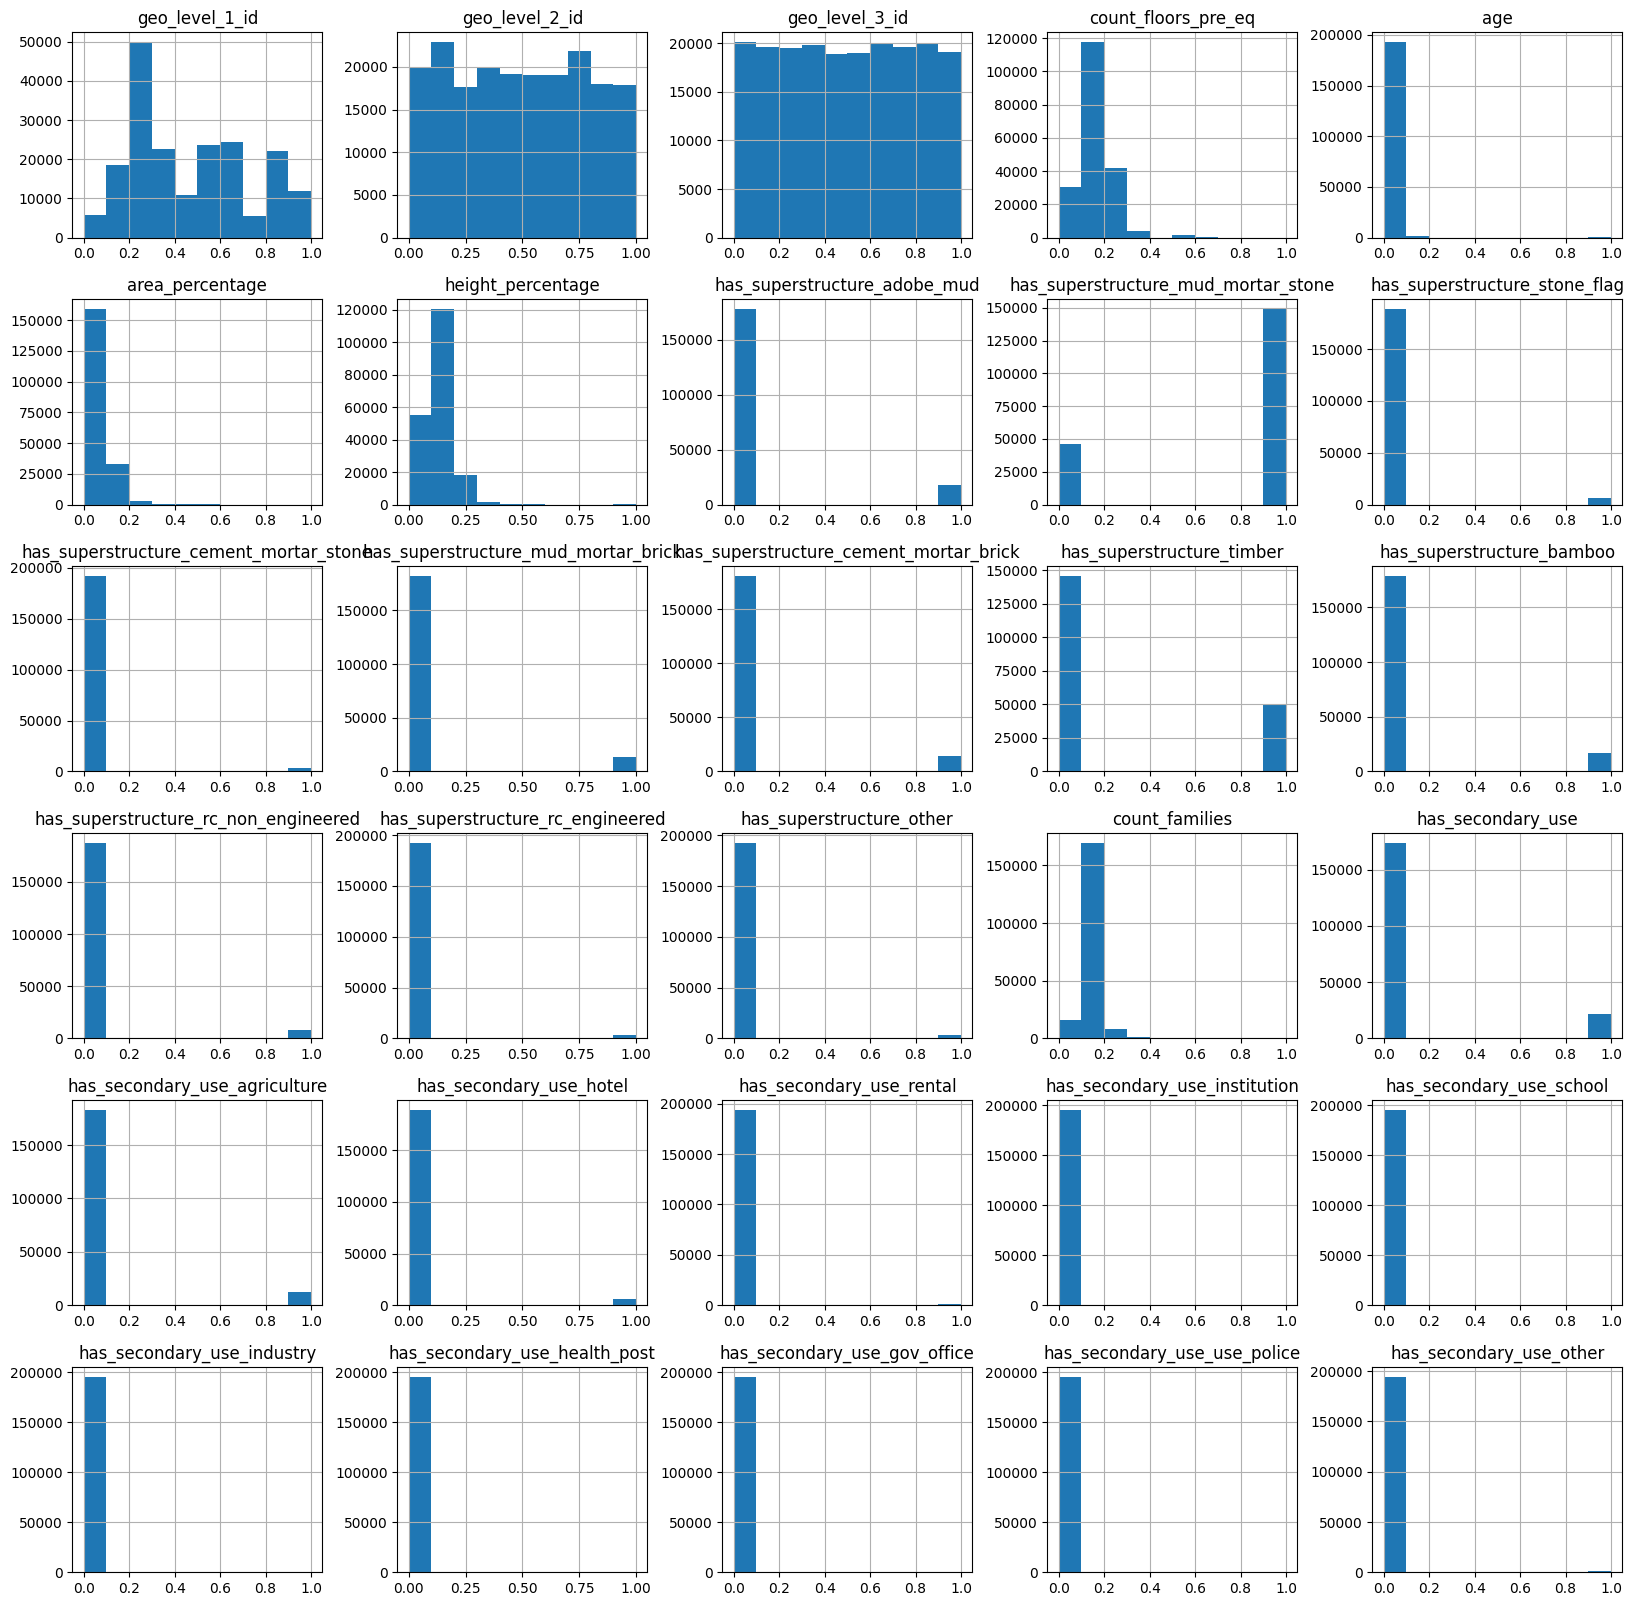

In [37]:
train_f.hist(figsize=(20, 20));

In [38]:
model = MLPClassifier(max_iter=1000, learning_rate='adaptive', verbose=True).fit(train_f.values, train_l.drop(columns=['building_id']).values);

Iteration 1, loss = 0.81144193


Iteration 2, loss = 0.78243559
Iteration 3, loss = 0.77461987
Iteration 4, loss = 0.76988454
Iteration 5, loss = 0.76670571
Iteration 6, loss = 0.76433145
Iteration 7, loss = 0.76239438
Iteration 8, loss = 0.76026067
Iteration 9, loss = 0.75850111
Iteration 10, loss = 0.75709334
Iteration 11, loss = 0.75579674
Iteration 12, loss = 0.75463549
Iteration 13, loss = 0.75344783
Iteration 14, loss = 0.75212666
Iteration 15, loss = 0.75085508
Iteration 16, loss = 0.74939868
Iteration 17, loss = 0.74824903
Iteration 18, loss = 0.74693249
Iteration 19, loss = 0.74590140
Iteration 20, loss = 0.74485714
Iteration 21, loss = 0.74379226
Iteration 22, loss = 0.74269614
Iteration 23, loss = 0.74129063
Iteration 24, loss = 0.74010954
Iteration 25, loss = 0.73936195
Iteration 26, loss = 0.73822448
Iteration 27, loss = 0.73763654
Iteration 28, loss = 0.73642865
Iteration 29, loss = 0.73605491
Iteration 30, loss = 0.73487947
Iteration 31, loss = 0.73436186
Iteration 32, loss = 0.73368940
Iteration 33, lo

In [40]:
print(f1_score(test_l.values, model.predict(test_f.values), average='micro'));

0.6583628800785867


In [32]:
input_real = pd.read_csv('Richter\'s Predictor values.csv');

ids = input_real['building_id'];
input_real.drop(columns=['building_id'], inplace=True);
input_real.drop(columns=rem_features, inplace=True);
input_real = transform(input_real)


df = pd.DataFrame(model.predict(input_real.values));
df['building_id'] = ids;

df = df[['building_id', 0]]
df.to_csv('ans.csv', index=False);
display(df);

,building_id,0
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,2
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,3


In [ ]:
exSub = pd.read_csv('Richter\'s Predictor submission format.csv')
display(exSub)

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1
...,...,...
86863,310028,1
86864,663567,1
86865,1049160,1
86866,442785,1
